In [2]:
!python -m pip install pandas_datareader

In [76]:
!python -m pip install TensorFlow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Attempting

In [4]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np 
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import datasets
import seaborn as sns  # Bibliothèque pour la visualisation des données
import tensorflow.compat.v1 as tf

In [5]:
start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
sp_data = pdr.DataReader('^GSPC', 'yahoo', start, end)
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [6]:
#sp_data.to_csv(r'C:\Users\Hajar\Desktop\S4\ML\Projet\sp_data.csv', index = True)
sp_data= pd.read_csv(r'C:\Users\Hajar\Desktop\S4\ML\Projet\sp_data.csv', index_col='Date', parse_dates=True)
# Change to datetime datatype.
#sp_data.loc[:, 'Date'] = pd.to_datetime(sp_data.loc[:,'Date'], format="%Y/%m/%d")

In [7]:
sp_data.head()
sp_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2004-12-17', '2004-12-20', '2004-12-21', '2004-12-22',
               '2004-12-23', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

<AxesSubplot:xlabel='Date'>

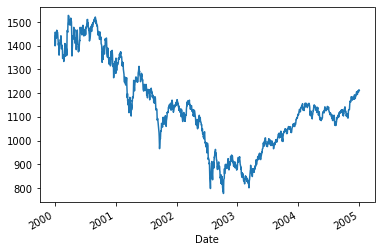

In [8]:
# Simple plotting of Amazon Stock Price

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# # First Subplot:"Close Price History"
# ax1.plot(sp_data["Date"], sp_data["Close"], color="blue")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")
# ax1.set_title("Close-High-low Price History")

# # Second Subplot:"High Price History"
# ax1.plot(sp_data["Date"], sp_data["High"], color="green")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")

# # Third Subplot:Low Price History"
# ax1.plot(sp_data["Date"], sp_data["Low"], color="red")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")

# # Fourth Subplot:"Volume History"
# ax2.plot(sp_data["Date"], sp_data["Volume"], color="orange")
# ax2.set_xlabel("Date", fontsize=12)
# ax2.set_ylabel("Stock Price")
# ax2.set_title("Volume History")
# plt.show()
sp_data['Close'].plot()

In [9]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_array = scaler.fit_transform(sp_data)

df2 = pd.DataFrame(sp_data.index)
# df['Close'] = scaled_array.tolist()
df = pd.DataFrame(scaled_array, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df.index = sp_data.index

df.head()
# plt.plot(scaled_array)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454


In [10]:
scaled_array[0]

array([0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
       0.90376982])

In [11]:
df['2000': '2004']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454
...,...,...,...,...,...,...
2004-12-27,0.550933,0.581852,0.577288,0.570348,0.233905,0.570348
2004-12-28,0.550151,0.581852,0.570348,0.581830,0.259117,0.581830
2004-12-29,0.550562,0.589894,0.581830,0.581710,0.235517,0.581710


In [51]:
tf.disable_v2_behavior()
# Données + classes cibles
#inputs = tf.placeholder(tf.float32, [len(scaled_array), len(scaled_array[0])])
#targets = tf.placeholder(tf.float32, [ len(scaled_array[0])])
X = np.array(df.index,dtype=int)
Y = np.array(df.reset_index(drop=True, inplace=False))
Y

# 20 exemples pour le test
(trainX, testX, trainY, testY) = train_test_split(X,Y,test_size=0.2)

In [52]:
class MultiLayerPerceptron:
    
    def __init__(self, arch , alpha = 0.1):
        # poids + biais
        self.W = {}
        self.B = {}
        
        # Taux d'adaptation
        self.alpha = alpha
        
        # Architecture :nbre de couches et nombre de neurones par couche
        self.arch = arch
        
        # Initialisation des poids: valeurs issues d'une distribution normale
        for i in np.arange(1,len(self.arch)):
            # Poids
            w = np.random.randn(self.arch[i], self.arch[i-1])
            self.W[i] = w/np.sqrt(self.arch[i])
            # Bias
            b = np.random.randn(self.arch[i],1)
            self.B[i] = b/np.sqrt(self.arch[i])            
            
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def dsigmoid(self, x): # x correspond ici à sigmoid(uj(t)), voir le cours
        return x * (1 - x)
    
     # Calcul et mémorisation de l'état de tous les neurones du réseau 
    def forward_pass(self, x):
        a = np.atleast_2d(x).T
        
        stats = {}
        stats[0] = a
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
            stats[layer] = a
        return stats    
    
    # Sortie du réseau associée à une entrée X (les états des autres neurones ne sont pas mémorisés)
    def predict(self, X):
        a = np.atleast_2d(X).T
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
        return a
    
    # Calcul de l'erreur quadratique moyenne
    def quadratic_loss(self, X, Y):
        Y = np.atleast_2d(Y).T
        predictions = self.predict(X)
        n = X.shape[0]
        loss = (1/n) * 0.5 * np.sum((predictions - Y) ** 2) 
        return loss 
    
    # Calcul des gradients locaux 
    def compute_gradient(self, x, y):
     
        L = len(self.arch) - 1 # indice de la couche de sortie 
        # Gradients
        Gw = {}
        Gb = {}
        A = self.forward_pass(x)
        # Les vecteurs delta  
        D = {}
        y = np.atleast_2d(y).T
        deltaL = (A[L] - y) * self.dsigmoid(A[L])
        D[L] = deltaL # Pour la sortie 
        
        # Calculer les vecteurs delta des autres couches en utilisants les vecteurs delta de la couche suivante
        for l in np.arange(L-1, 0, -1):
            D[l] = (self.W[l+1].T.dot(D[l+1])) * self.dsigmoid(A[l])
        for l in np.arange(L, 0, -1):
            Gb[l] = D[l]
            Gw[l] = D[l].dot(A[l-1].T)        
       
        return (Gw, Gb)
    
    # Mise à jour par rapport à l'erreur moyenne (relative à un bloc d'exemples)
    def update_with_bloc(self, bloc):
      
        m = len(bloc)
        # Gradients locaux
        GCw = {}
        GCb = {}
        # Initialiser à zeros 
        for i in np.arange(1,len(self.arch)):
            GCw[i] = np.zeros(self.W[i].shape)
            GCb[i] = np.zeros(self.B[i].shape)
            
        # Calcul des gradients
        for x, y in bloc:
            Gw, Gb = self.compute_gradient(x, y)
            for i in np.arange(1,len(self.arch)): 
                GCw[i] += Gw[i]
                GCb[i] += Gb[i]
                
        # Mettre à jour les poids 
        for l in np.arange(1,len(self.arch)):
            self.W[l] = self.W[l] - (self.alpha/m)*(GCw[l])
            self.B[l] = self.B[l] - (self.alpha/m)*(GCb[l])
    
    # Iteration: entrainement en utilisant tous les exemples, un bloc de taille bloc_size chaque fois
    def train(self, D, bloc_size):
        train_size = len(D)
        np.random.shuffle(D) # tirage au sort
        blocs = [D[k : k + bloc_size] # Bloc d'exemples
            for k in range(0, train_size, bloc_size)]
        
        for bloc in blocs: # Mise à jour suite au passage de chaque bloc
            self.update_with_bloc(bloc)
  
    # Apprentissage
    def fit(self, X, Y, bloc_size = 20, iterations = 10000, error_min = 0.001, displayPeriod = 5000):
     
        # Exemples avec X et Y Assemblés
        D = list(zip(X,Y))
        
        # Erreurs
        errors = [self.quadratic_loss(X,Y)]   # Erreur initiale    
        
        iter = 0
        print("Itération: {}-{}, Erreur: {:.6f}".format(iter, iterations,errors[iter]))
        while iter < iterations and errors[iter] > error_min: # Tour de boucle 
            
            self.train(D, bloc_size)  # Mettre à jour 
            errors.append(self.quadratic_loss(X,Y))         # Nouvelle erreur
          
            if (iter+1) % displayPeriod == 0:
                print("Itération: {}-{}, Error: {:.6f}".format(iter + 1, iterations,errors[iter]))
            iter += 1
        
        if errors[iter] < error_min: # Erreur inférieur à la valeur minimale
            print("Fin: erreur minimale atteinte : {:.6f}.", errors[iter])
        elif iter == iterations:
            print("Fin: nombre maximum d'itérations atteint.")
       
        return (errors, iter)

In [55]:
pmc = MultiLayerPerceptron(arch=[trainY.shape[1],1024,512, 250,100,6], alpha=0.1)
(errs, iter_fin) = pmc.fit(trainX, trainY, iterations=10, bloc_size=5, error_min=0.00001, displayPeriod=2)


ValueError: shapes (1024,6) and (1004,1) not aligned: 6 (dim 1) != 1004 (dim 0)

In [23]:
randIndex = np.random.randint(0,df.shape[0]-1,1)[0]
print('Sortie prédite : \n'+str(pmc.predict(df[randIndex]))+')' )

KeyError: 1111